In [100]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

In [74]:
boston = pd.read_csv('housing_data.csv')

In [75]:
boston.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,NaN,36.2


In [76]:
features = ['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT', 'MEDV']

In [77]:
boston.shape

(506, 14)

In [78]:
boston.isnull().sum()

CRIM       20
ZN         20
INDUS      20
CHAS       20
NOX         0
RM          0
AGE        20
DIS         0
RAD         0
TAX         0
PTRATIO     0
B           0
LSTAT      20
MEDV        0
dtype: int64

In [79]:
boston[features]=boston[features].fillna(boston[features].median())

In [80]:
boston.isnull().sum()

CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
MEDV       0
dtype: int64

<Axes: >

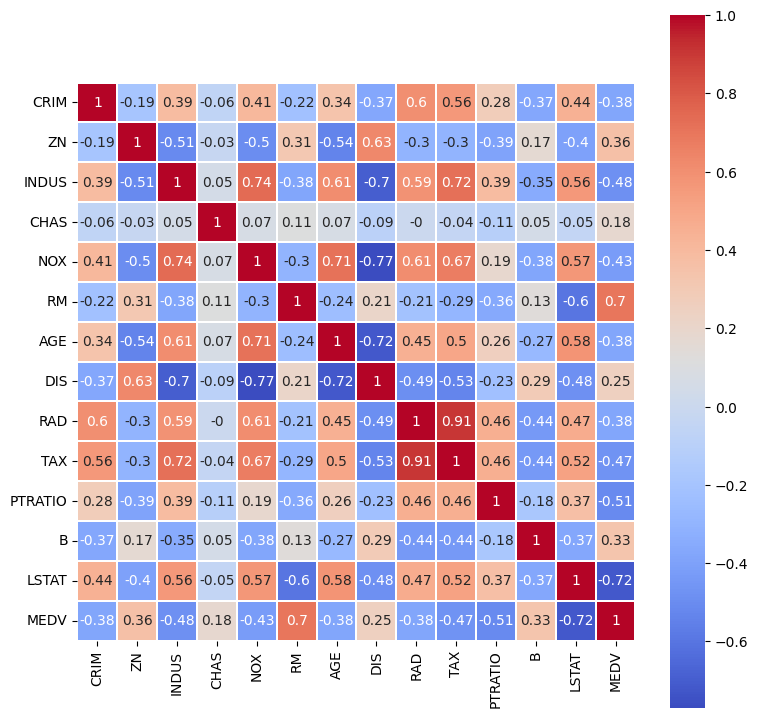

In [81]:
plt.figure(figsize=(9,9))
sns.heatmap(data=boston.corr().round(2), annot=True, square=True, cmap='coolwarm', linewidth=0.2)

In [82]:
prime_features = ['LSTAT', 'RM', 'DIS', 'NOX', 'TAX', 'MEDV']

In [83]:
df = boston[['LSTAT', 'RM', 'DIS', 'NOX', 'TAX', 'MEDV']]
df.shape

(506, 6)

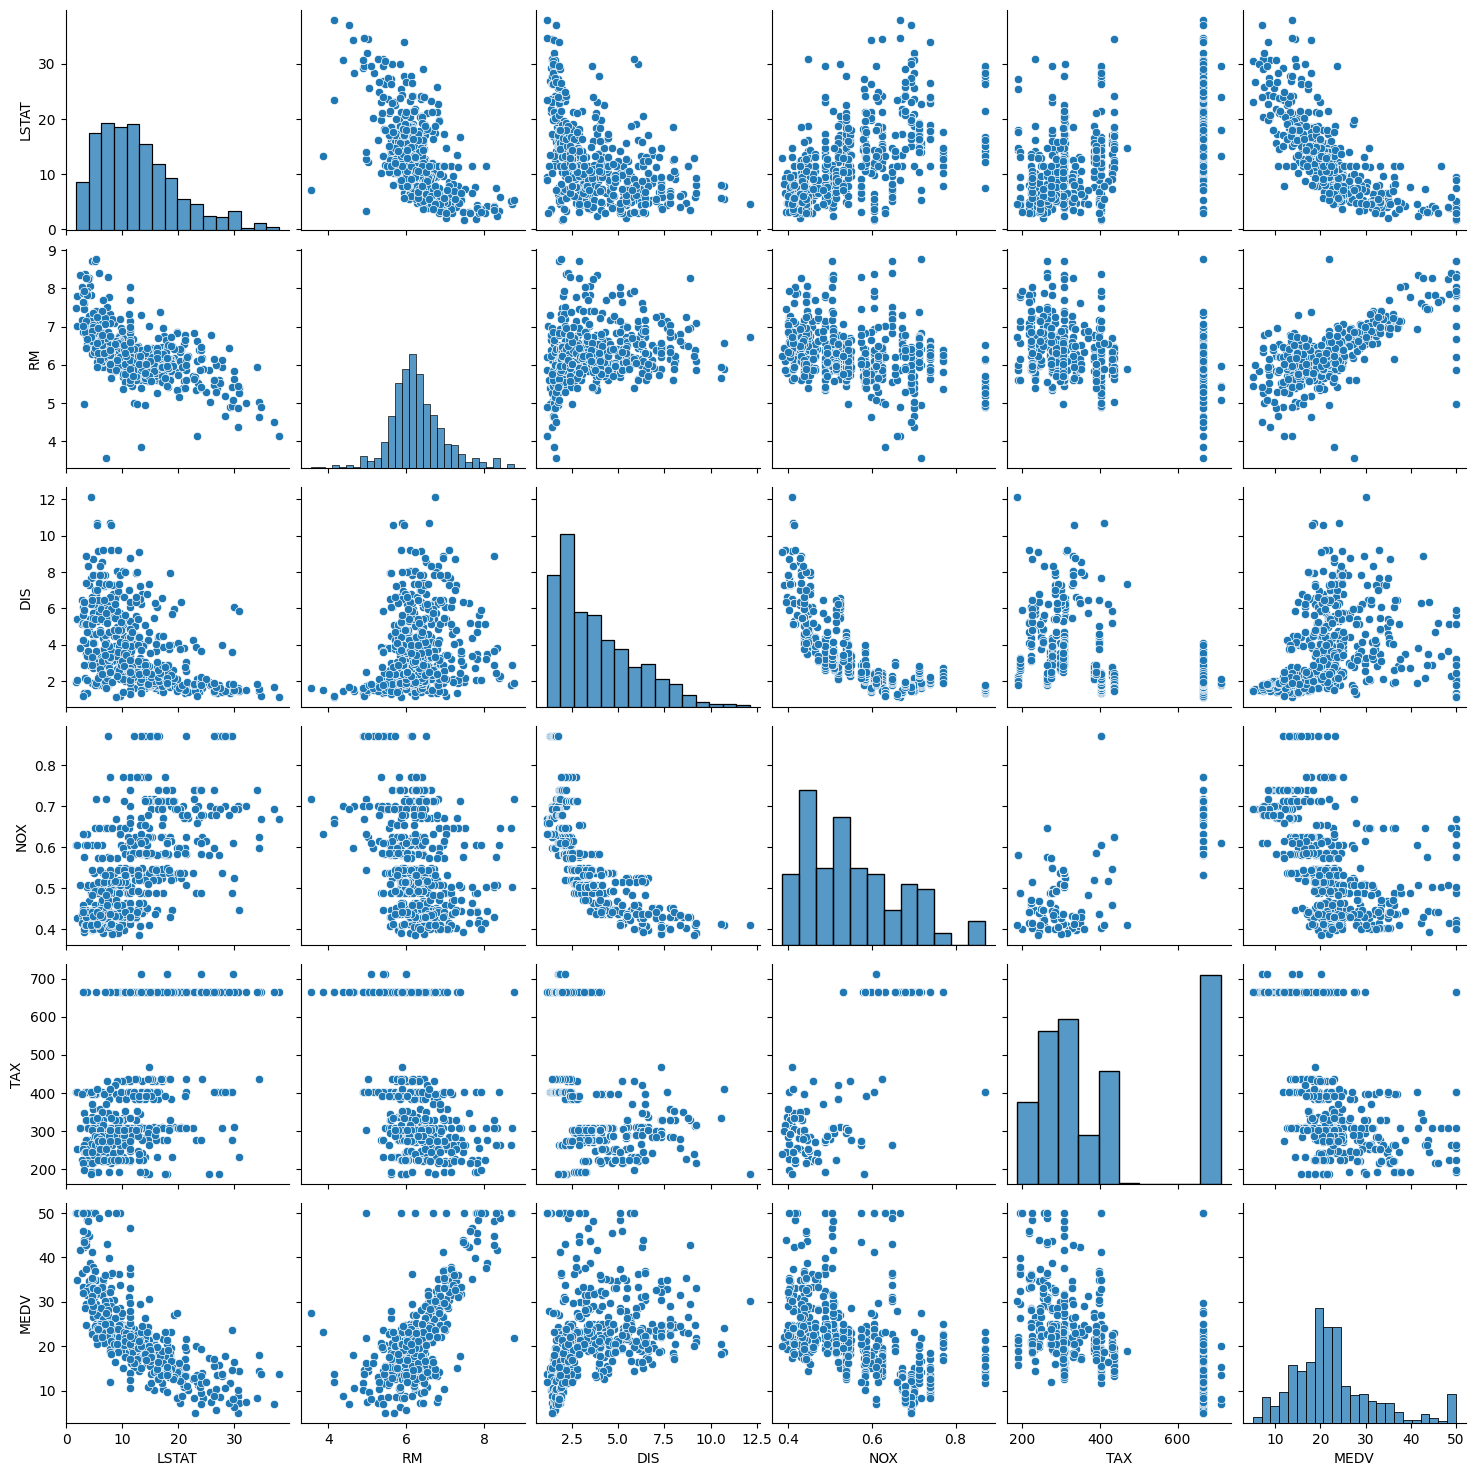

In [84]:
sns.pairplot(df)

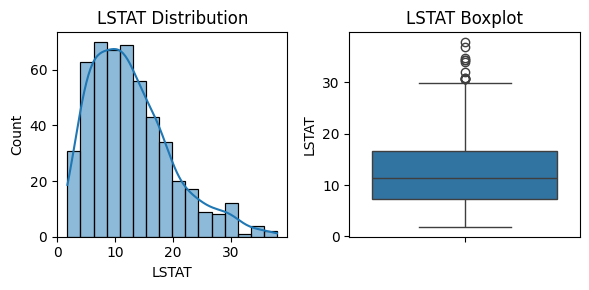

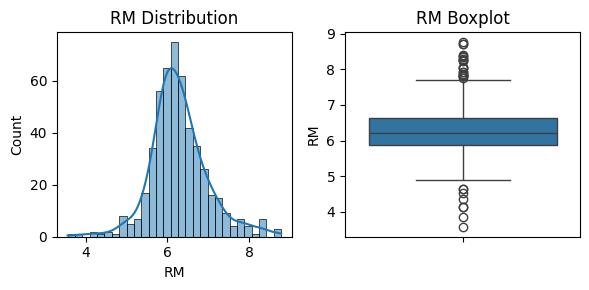

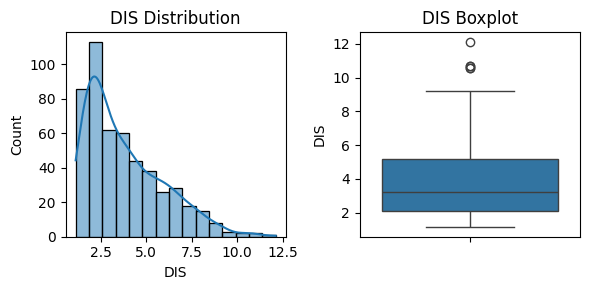

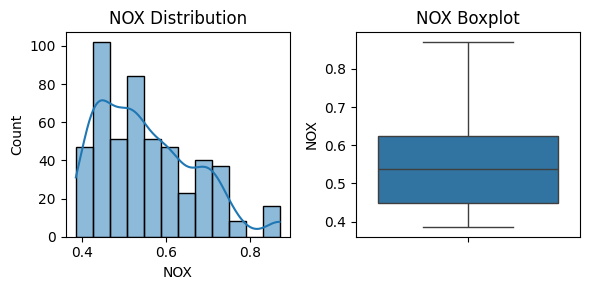

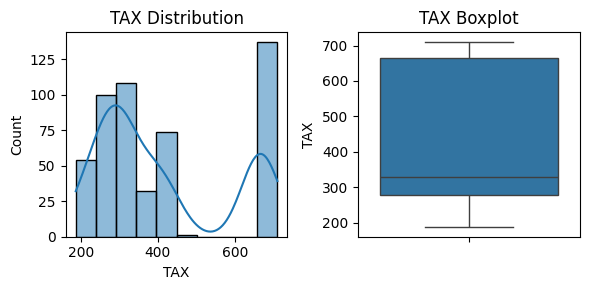

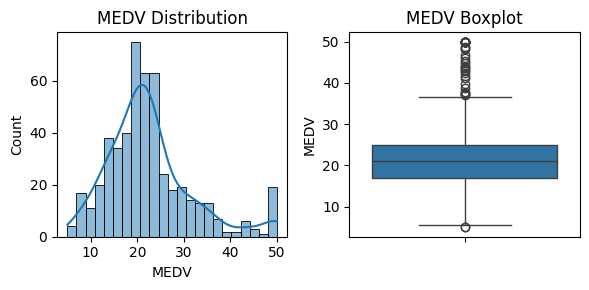

In [85]:
for feature in prime_features:
    plt.figure(figsize=(6,3))
    plt.subplot(121)
    plt.title(f'{feature} Distribution')
    sns.histplot(df[feature], kde=True)
    plt.subplot(122)
    plt.title(f'{feature} Boxplot')
    sns.boxplot(df[feature])
    plt.tight_layout()
    plt.show()

In [86]:
def outliers(data, threshold = 1.5):
    q1 = data.quantile(0.25)
    q3 = data.quantile(0.75)
    iqr = q3 - q1
    lower = q1 - iqr*threshold
    upper = q3 + iqr*threshold
    return (data<lower)|(data>upper)

count = df.apply(lambda x: outliers(x).sum())
print(count)

LSTAT    12
RM       30
DIS       5
NOX       0
TAX       0
MEDV     40
dtype: int64


In [87]:
outlier_cols = ['LSTAT', 'MEDV', 'RM']
outlier_mask = df[outlier_cols].apply(lambda x: outliers(x)).any(axis=1)
df = df[~outlier_mask]
df.shape

(450, 6)

In [88]:
outlier_mask = boston[outlier_cols].apply(lambda x: outliers(x)).any(axis=1)
boston = boston[~outlier_mask]
boston.shape

(450, 14)

In [89]:
X = df.drop('MEDV', axis = 1)
y = df['MEDV']

In [90]:
print(f'X Shape: {X.shape}, Y Shape: {y.shape}')

X Shape: (450, 5), Y Shape: (450,)


In [91]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)
print(f'Train shapes: X Shape: {X_train.shape}, Y Shape: {y_train.shape}')
print(f'Test shapes: X Shape: {X_test.shape}, Y Shape: {y_test.shape}')

Train shapes: X Shape: (360, 5), Y Shape: (360,)
Test shapes: X Shape: (90, 5), Y Shape: (90,)


In [94]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [96]:
model = LinearRegression()
model.fit(X_train_scaled, y_train)

LinearRegression()

In [102]:
y_pred = model.predict(X_test_scaled)

r2 = r2_score(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_test, y_pred)

print(f'Mean absolute error: {mae:.2f}')
print(f'R2 score: {r2:.2f}')
print(f'Mean squared error: {mse:.2f}')
print(f'Root mean squared error: {rmse:.2f}')

Mean absolute error: 2.62
R2 score: 0.66
Mean squared error: 11.36
Root mean squared error: 3.37


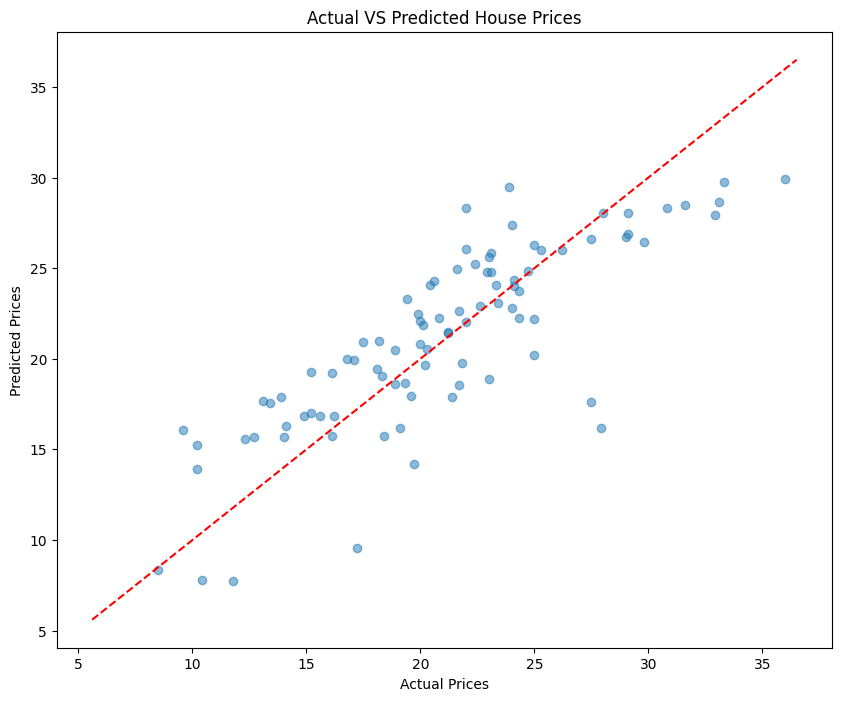

In [103]:
plt.figure(figsize=(10, 8))
plt.scatter(y_test, y_pred, alpha = 0.5)
plt.plot([y.min(), y.max()], [y.min(), y.max()], 'r--') 
plt.xlabel('Actual Prices')
plt.ylabel('Predicted Prices')
plt.title('Actual VS Predicted House Prices')
plt.show()

RuntimeError: `lowess=True` requires statsmodels, an optional dependency, to be installed.

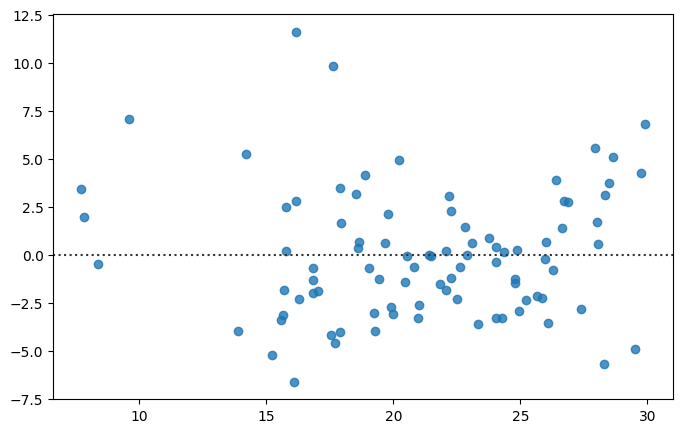

In [105]:
residuals = y_test - y_pred
plt.figure(figsize=(8, 5))
sns.residplot(x=y_pred, y=residuals, lowess = True, line_kws={'color':'red'})
plt.xlabel('Predicted values')
plt.ylabel('Residuals')
plt.title('Residual Plot')
plt.show()